In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import os 
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [2]:
df_train = pd.read_csv('Training_set.csv')
df_test = pd.read_csv('Testing_set.csv')
df_train

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


In [3]:
df_train['label'].value_counts()

label
MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
CRECENT            97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: count, Length: 75, dtype: int64

In [4]:
counts = df_train['label'].value_counts().sort_index()

C:\Users\steve\AppData\Local\Temp\ipykernel_34008\3983972395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y= counts.values, palette='viridis')


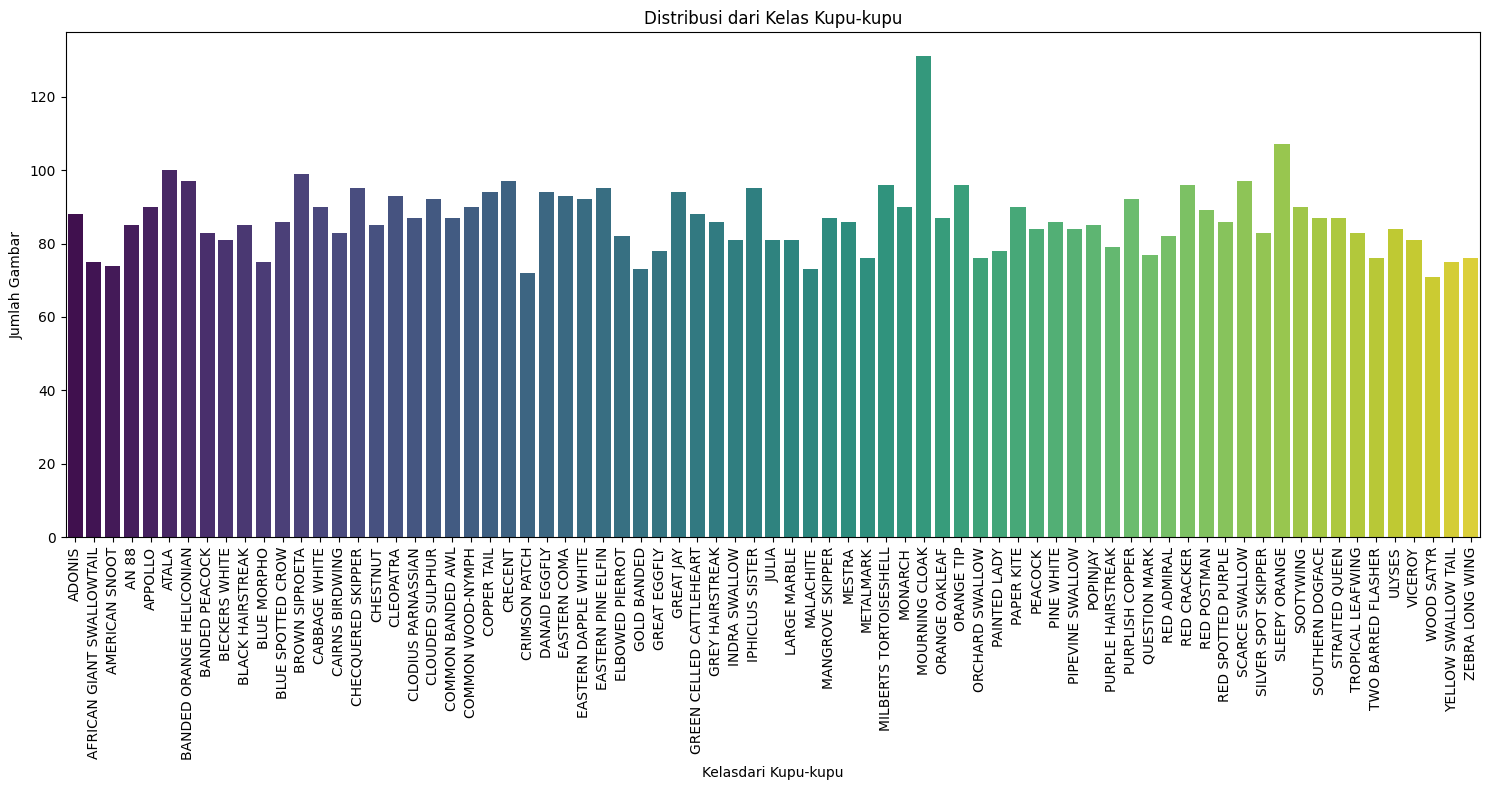

In [5]:
fig = plt.figure(figsize=(15,8))

sns.barplot(x=counts.index, y= counts.values, palette='viridis')
plt.title("Distribusi dari Kelas Kupu-kupu")
plt.xlabel("Kelasdari Kupu-kupu")
plt.ylabel("Jumlah Gambar")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

image_dir = 'train/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


In [18]:
model = Sequential([
    Input(shape=(150,150,3)),

    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Dropout(0.2),
    Flatten(),

    Dense(units=1028, activation='relu'),
    Dropout(0.3),
    Dense(units=75, activation='softmax')
])

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1028)           │    85,267,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1028)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 75)             │        77,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,715,451 (326.98 MB)

 Trainable params: 85,715,451 (326.98 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
print("Training samples:", train_generator.samples)
print("Validation samples:", val_generator.samples)


Training samples: 5199
Validation samples: 1300


In [20]:
history = model.fit(
    train_generator, 
    epochs=40, 
    batch_size=128, 
    validation_data=val_generator, 
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.0352 - loss: 4.2251 - val_accuracy: 0.1242 - val_loss: 3.5040
Epoch 2/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.1368 - loss: 3.4690 - val_accuracy: 0.2000 - val_loss: 2.8303
Epoch 3/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.2075 - loss: 3.0366 - val_accuracy: 0.2953 - val_loss: 2.6809
Epoch 4/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.2626 - loss: 2.7903 - val_accuracy: 0.4500 - val_loss: 2.1344
Epoch 5/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.3221 - loss: 2.5432 - val_accuracy: 0.4187 - val_loss: 2.0755
Epoch 6/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.3606 - loss: 2.3916 - val_accuracy: 0.2500 - val_loss: 2.3957
Epoch 7/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.4107 - loss: 2.1950 - val_accuracy: 0.4719 - val_loss: 1.8642
Epoch 8/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.4174 - loss: 2.1336 - val_accu

In [21]:
loss, accuracy = model.evaluate(train_generator)
print(f'Loss : {loss}')
print(f'Accuracy : {accuracy}')

163/163 ━━━━━━━━━━━━━━━━━━━━ 135s 822ms/step - accuracy: 0.8171 - loss: 0.6307
Loss : 0.6372372508049011
Accuracy : 0.8161184787750244


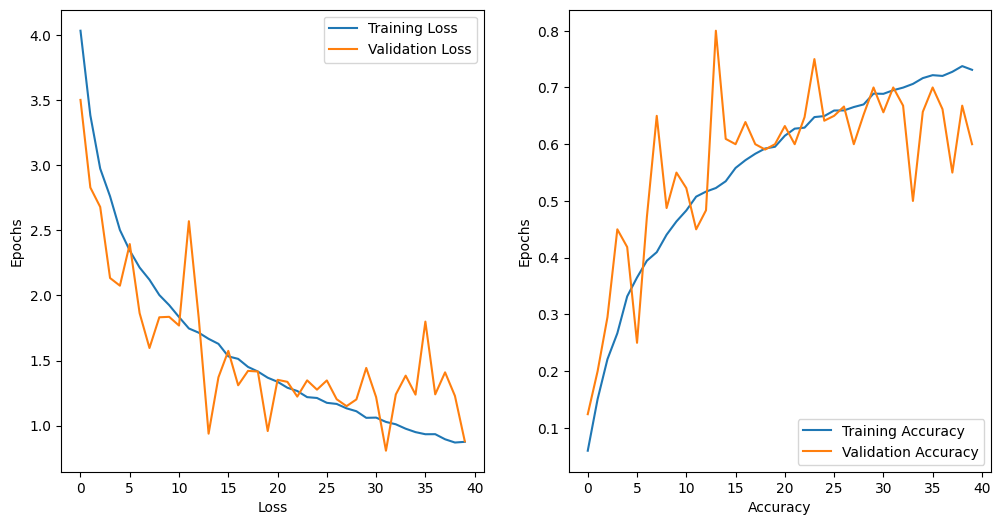

In [23]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()